<a href="https://colab.research.google.com/github/Yogesh-8998/Yogesh-Patil/blob/main/CHD_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
 
%matplotlib inline
 
 
import warnings
warnings.filterwarnings('ignore')

In [11]:
 df = pd.read_csv("/content/drive/MyDrive/Almabetter /Machine Learning/Capstone Project /data_cardiovascular_risk.csv")

In [12]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.shape

(3390, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Exploratry Data Analysis

In [8]:
#Missing values
#total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.04%


In [9]:
 # percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


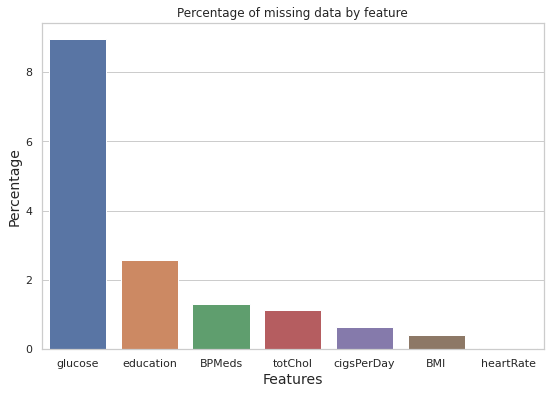

In [10]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

Glucose level has the highest percentage of missing values i.e 8.96%, remaing have very few missing values. As of total 15.04% missing values we have.

In [11]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

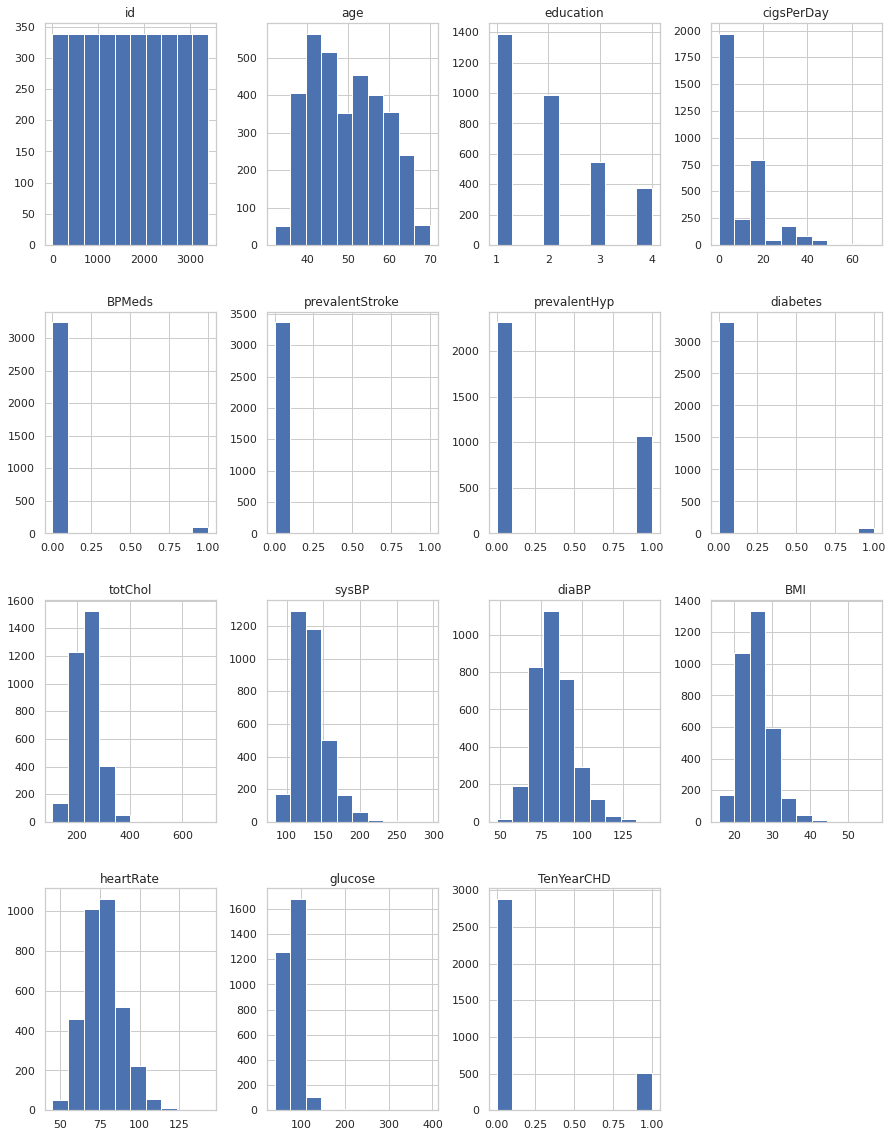

In [12]:
 # plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

As prevstroke, diabetes and BP meds are too poorly balanced data

Case counts

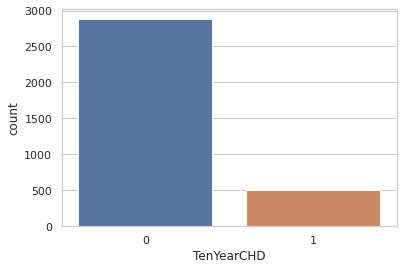

There are 2879 patients without heart disease and 511 patients with the disease


In [13]:
sns.countplot(x='TenYearCHD',data=df)
plt.show()
cases = df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

No. of people disease vs Age

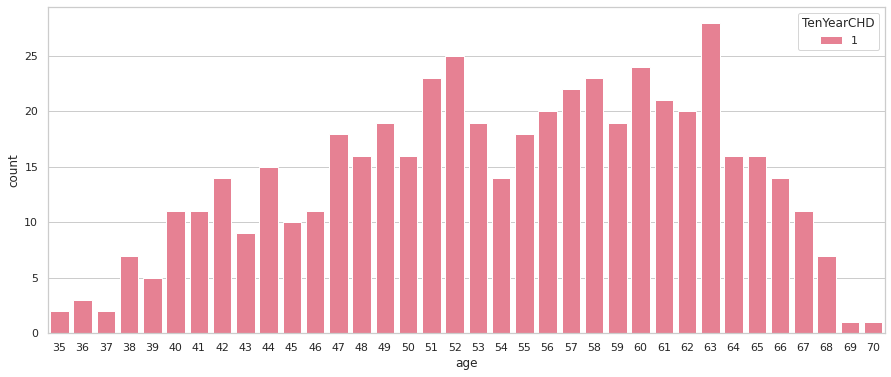

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df[df["TenYearCHD"]==1], hue = 'TenYearCHD',palette='husl')
plt.show()

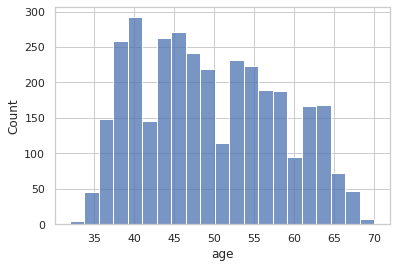

In [15]:
 sns.histplot(df['age'])

The People With the highest risk of developing CHD are b/w 51 and 63

Correlation Heatmap

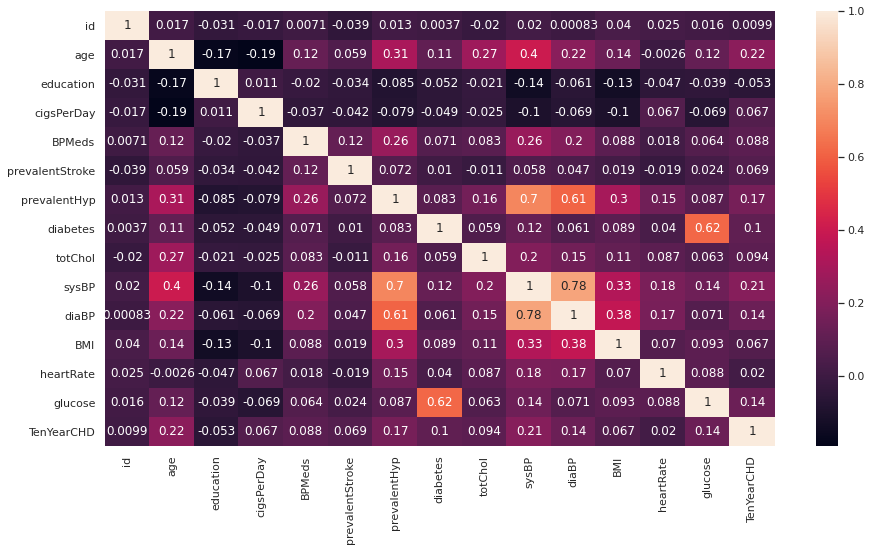

In [16]:
 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

High Correlation b/w the independant valiables systolic Bp and pevalentHyp, dia BP and pevalent Hyp, glucose and diabetes, systolic BP and Distolic BP

High Correlation b/w Target and independent vars are Age, prevalent Hyp, Systolic BP, glucose, Distolic BP and Diabetes. As if 6 vars are good corelating.

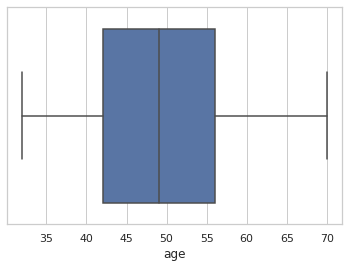

In [17]:
 
import seaborn as sns
 
sns.boxplot(df['age'])

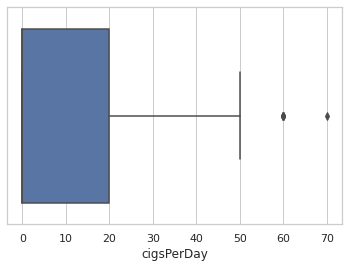

In [18]:
 sns.boxplot(df['cigsPerDay'])

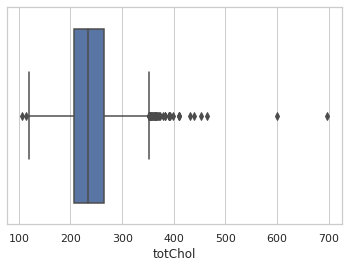

In [19]:
 sns.boxplot(df['totChol'])

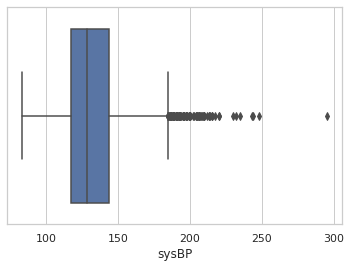

In [20]:
 sns.boxplot(df['sysBP'])

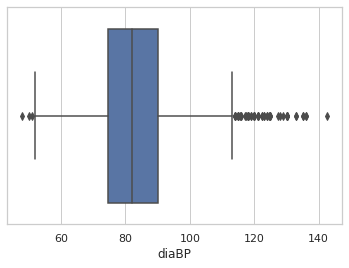

In [21]:
 sns.boxplot(df['diaBP'])

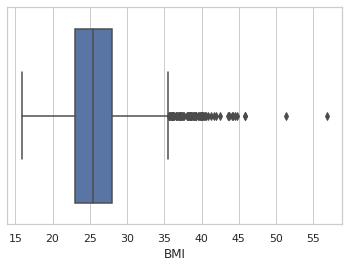

In [22]:
 sns.boxplot(df['BMI'])

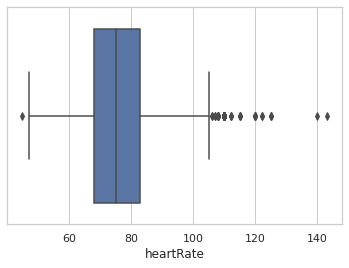

In [23]:
 sns.boxplot(df['heartRate'])

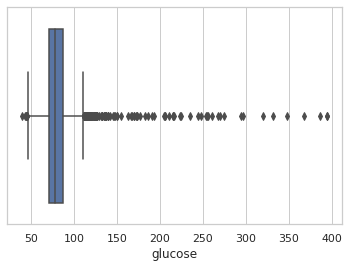

In [24]:
 sns.boxplot(df['glucose'])

In [25]:
 num_cat=['age', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

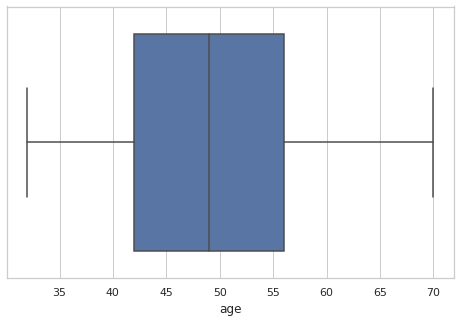

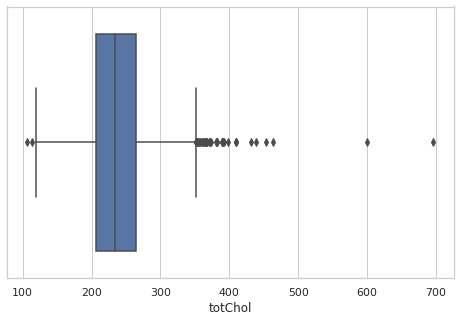

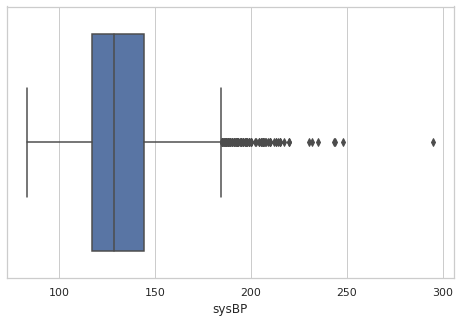

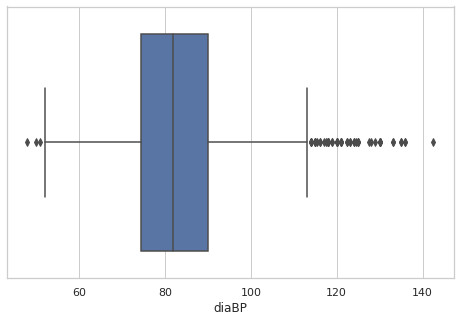

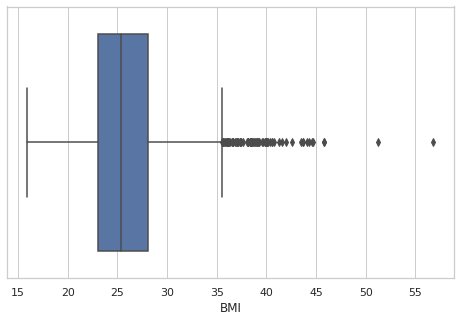

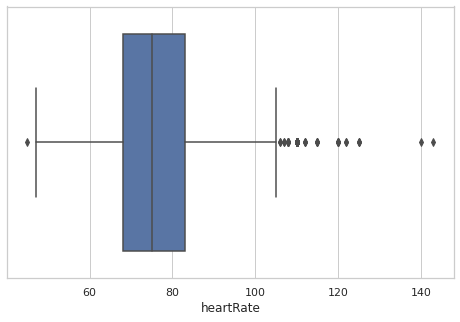

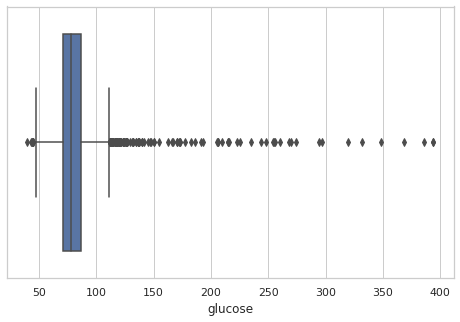

In [26]:
 for i in num_cat:
  plt.figure(figsize=(8,5))
  sns.boxplot(df[i])

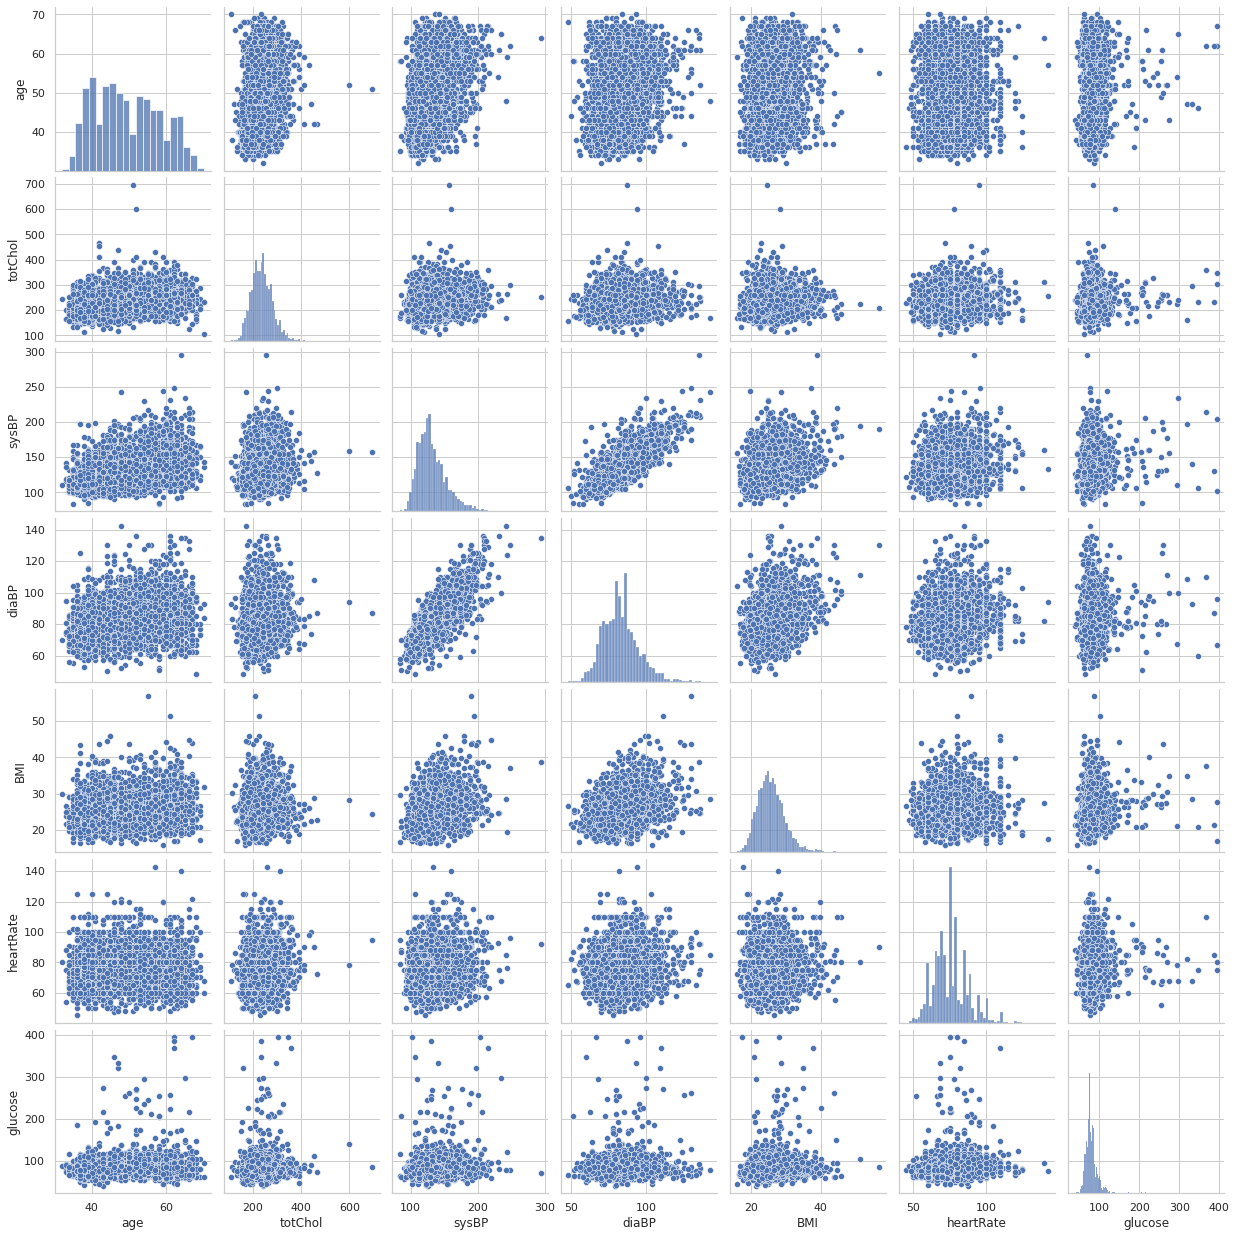

In [27]:
 sns.pairplot(df[num_cat])

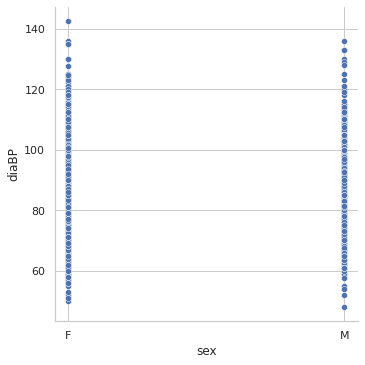

In [28]:
 sns.relplot(df['sex'],df['diaBP'])

Data Preprocessing


In [13]:
# Dropping id column
 
df.drop('id', inplace=True, axis=1)

In [14]:
df_new = df.copy()

In [15]:
df_new['sex'] = np.where(df.sex=='F', 1, 0)
df_new['is_smoking'] = np.where(df['is_smoking']=='YES', 1, 0)

In [16]:
df_new.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
print(df_new['cigsPerDay'].head(20))

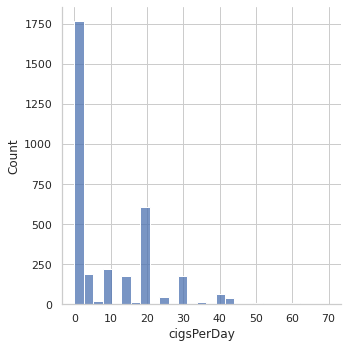

In [ ]:
 sns.displot(df.cigsPerDay)

In [18]:
df_new['education'].fillna(0,inplace=True)

In [19]:
#df_new['BPMeds'].fillna(0,inplace=True)

In [20]:
 df_new['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)

In [21]:
#df_new['cigsPerDay'].fillna(0,inplace=True)

In [22]:
 df_new['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

In [23]:
#df_new['totChol'].fillna(0,inplace=True)

In [24]:
 df_new['totChol'].fillna(df['totChol'].median(), inplace=True)

In [25]:
#df_new['BMI'].fillna(0,inplace=True)

In [26]:
 df_new['BMI'].fillna(df['BMI'].median(), inplace=True)

In [27]:
#df_new['glucose'].fillna(0,inplace=True)

In [28]:
 df_new['glucose'].fillna(df['glucose'].median(), inplace=True)

In [29]:
#df_new['heartRate'].fillna(0,inplace=True)

In [30]:
 df_new['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [31]:
 df_new[df_new.cigsPerDay==0]['TenYearCHD'].value_counts()

0    1488
1     237
Name: TenYearCHD, dtype: int64

In [32]:
 df_new[(df_new.cigsPerDay<=20)&(df.cigsPerDay>0)]['TenYearCHD'].value_counts()

0    1104
1     197
Name: TenYearCHD, dtype: int64

In [33]:
 df_new[(df_new.cigsPerDay>20)]['TenYearCHD'].value_counts()

0    287
1     77
Name: TenYearCHD, dtype: int64

Bins For CigsPerDay

In [34]:
 def cig_cat(x):
  if x==0:
    return "zero"
  elif x>0 and x<=20:
    return "low cigs"
  elif x>20:
    return "high risk"
df_new['cigs_cat']=df.cigsPerDay.apply(cig_cat)
df_new.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigs_cat
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,low cigs
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,zero
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,low cigs
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,low cigs
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,high risk


Doing log transform on skewness

In [35]:
 for i in  ['glucose','heartRate','BMI','totChol','sysBP']:
  df_new[i]=np.log(df_new[i])

In [36]:
df_new.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigs_cat
0,64,2.0,1,1,3.0,0.0,0,0,0,5.398163,4.997212,85.0,3.233961,4.499810,4.382027,1,low cigs
1,36,4.0,0,0,0.0,0.0,0,1,0,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,0,zero
2,46,1.0,1,1,10.0,0.0,0,0,0,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,0,low cigs
3,50,1.0,0,1,20.0,0.0,0,1,0,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,low cigs
4,64,1.0,1,1,30.0,0.0,0,0,0,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,high risk


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
 16  cigs_cat         3368 non-null   object 
dtypes: float64(9),

In [38]:
df_new.describe()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,1.920354,0.567257,0.497640,9.010619,0.029499,0.006490,0.315339,0.025664,5.450822,4.874307,82.883038,3.238131,4.318393,4.379670,0.150737
std,8.592878,1.053104,0.495529,0.500068,11.862839,0.169224,0.080309,0.464719,0.158153,0.186365,0.158885,12.023581,0.153353,0.154525,0.197525,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.672829,4.424847,48.000000,2.770086,3.806662,3.688879,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.327876,4.762174,74.500000,3.136798,4.219508,4.276666,0.000000
50%,49.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.455321,4.855929,82.000000,3.233961,4.317488,4.356709,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,5.575949,4.969813,90.000000,3.332115,4.418841,4.442651,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,6.545350,5.686975,142.500000,4.039536,4.962845,5.976351,1.000000


In [39]:
 df_new=pd.get_dummies(df_new, columns=['cigs_cat'],drop_first=True)

In [40]:
#  X=df_new.drop(['TenYearCHD','education','cigsPerDay'],axis=1)
# Y=df_new['TenYearCHD']

In [88]:
X.head()

,age,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,cigs_cat_low cigs,cigs_cat_zero
0,64,1,1,0.0,0,0,0,5.398163,4.997212,85.0,3.233961,4.499810,4.382027,1,0
1,36,0,0,0.0,0,1,0,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,0,1
2,46,1,1,0.0,0,0,0,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,1,0
3,50,0,1,0.0,0,1,0,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,0
4,64,1,1,0.0,0,0,0,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,0


In [160]:
 X=df_new.drop(['TenYearCHD','education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','cigs_cat_low cigs '],axis=1)
Y=df_new['TenYearCHD']

KeyError: ignored

In [129]:
X.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,cigs_cat_low cigs,cigs_cat_zero
0,64,5.398163,4.997212,85.0,3.233961,4.499810,4.382027,1,0
1,36,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,0,1
2,46,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,1,0
3,50,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,0
4,64,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,0


In [130]:
 print(X.shape)
print(Y.shape)

(3390, 9)
(3390,)


SMOTE

In [131]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [132]:
# the numbers before smote
num_before = dict(Counter(Y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, Y_smote = pipeline.fit_resample(X, Y)


#the numbers after smote
num_after =dict(Counter(Y_smote))

In [133]:
print(num_before, num_after)

{1: 511, 0: 2879} {0: 2878, 1: 2303}


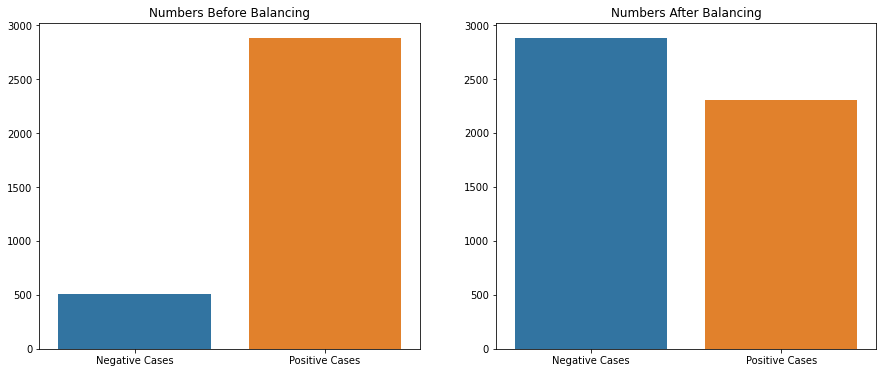

In [134]:

labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [135]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [136]:
 
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
fit_Transform = standard.fit_transform(X_train)
fit_Transform

array([[-0.18280809,  0.24110115, -0.70884891, ..., -0.12102609,
        -0.78806094,  0.99265236],
       [-0.18280809,  0.74279607, -0.73604709, ...,  0.13051968,
         1.2689374 , -1.00740203],
       [-0.06642885,  0.28475437,  0.4761148 , ..., -0.25167934,
         1.2689374 , -1.00740203],
       ...,
       [-1.11384195, -0.79558114, -0.46916893, ...,  0.81747647,
         1.2689374 , -1.00740203],
       [-1.34660041, -2.04903674,  0.05723119, ..., -0.25167934,
        -0.78806094,  0.99265236],
       [-0.53194578, -0.26418776, -2.03169465, ..., -0.18592851,
         1.2689374 , -1.00740203]])

In [137]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
#transform testing dataabs
X_test_norm = norm.transform(X_test)

In [138]:
 from sklearn.preprocessing import StandardScaler
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
# fit on training data column
scale =  StandardScaler().fit(X_train)    
#transform the training data column
X_train_stand = scale.transform(X_train_stand)
 # transform the test data column
X_test_stand = scale.transform(X_test_stand)

DecisionTree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
chd_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=7)
# chd_classifier.fit(X_train, Y_train)

In [140]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(chd_classifier, param_grid=params, n_jobs=-1)

In [141]:
chd_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [142]:
y_predicted = chd_classifier.predict(X_test)

In [143]:
y_predicted[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [144]:
Y_test[:10]

1841    0
3332    0
1299    1
1280    0
1414    0
698     0
817     0
2495    0
3071    0
320     0
Name: TenYearCHD, dtype: int64

In [145]:
from sklearn.metrics import accuracy_score, auc
 
accuracy_score(Y_test, y_predicted) * 100

84.51327433628319

In [146]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       576
           1       0.40      0.06      0.10       102

    accuracy                           0.85       678
   macro avg       0.63      0.52      0.51       678
weighted avg       0.79      0.85      0.79       678



In [147]:

from sklearn.metrics import recall_score
recall_score(Y_test,y_predicted) 


0.058823529411764705

In [148]:
df_new.iloc[-1]

age                  54.000000
education             3.000000
sex                   1.000000
is_smoking            0.000000
cigsPerDay            0.000000
BPMeds                0.000000
prevalentStroke       0.000000
prevalentHyp          0.000000
diabetes              0.000000
totChol               5.662960
sysBP                 4.820282
diaBP                77.000000
BMI                   3.397189
heartRate             4.369448
glucose               4.521789
TenYearCHD            0.000000
cigs_cat_low cigs     0.000000
cigs_cat_zero         1.000000
Name: 3389, dtype: float64

In [149]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(2712, 9)

 The shape of test dataset :
(678, 9)


In [150]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    2303
1     409
Name: TenYearCHD, dtype: int64

 Distribution of classes of dependent variable in test :
0    576
1    102
Name: TenYearCHD, dtype: int64


Randomforest Classifier

In [151]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50,80,100], 'max_depth':[4, 6, 8],'min_samples_split':[50,100,150],'min_samples_leaf':[40,50]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'recall',verbose=2, cv=5)

# Fit the object to train dataset
classifier.fit(X_train, Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   57.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [152]:
classifier_optimal_model = classifier.best_estimator_

In [153]:
classifier.best_params_

{'max_depth': 4,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 50}

In [154]:
classifier_optimal_model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
train_preds =  classifier_optimal_model.predict(X_train)
test_preds  = classifier_optimal_model.predict(X_test)

In [156]:
accuracy_score(Y_train,train_preds),accuracy_score(Y_test,test_preds)

(0.849188790560472, 0.8495575221238938)

In [157]:
roc_auc_score(Y_train,train_preds),roc_auc_score(Y_test,test_preds)

(0.5, 0.5)

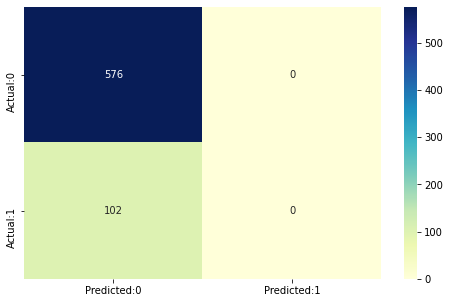

In [125]:
cm=confusion_matrix(Y_test,test_preds)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [69]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[2303,    0],
       [ 385,   24]])

In [70]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[575,   1],
       [100,   2]])

In [71]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.5293398533007335

In [72]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.5089358660130718

In [73]:
features = X_train.columns
importances = classifier.best_estimator_.feature_importances_
indices = np.argsort(importances)

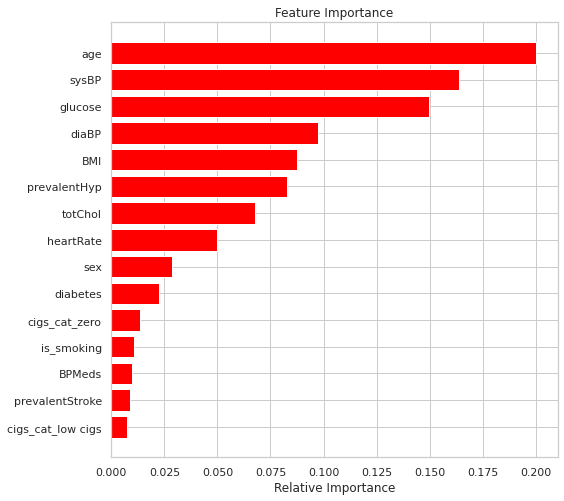

In [74]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

KNN Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [83]:
# train the model
knn_clf.fit(X_train,Y_train)
knn_clf.best_params_

{'n_neighbors': 8}

In [84]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [85]:
#accuracy
knn_accuracy = accuracy_score(Y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 85.1%


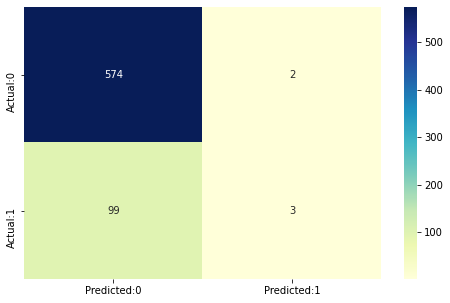

In [86]:
cm=confusion_matrix(Y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [87]:
print(classification_report(Y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       576
           1       0.60      0.03      0.06       102

    accuracy                           0.85       678
   macro avg       0.73      0.51      0.49       678
weighted avg       0.81      0.85      0.79       678



In [82]:
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier(scale_pos_weight=8)

In [85]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),scale_pos_weight=8)
    
    evaluation = [( X_train, Y_train), ( X_test, Y_test)]
    
    clf.fit(X_train, Y_train)
    

    pred = clf.predict(X_test)
    recall = recall_score(Y_test, pred>0.5)
    
    return {'loss': -recall, 'status': STATUS_OK }

In [86]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

100%|██████████| 100/100 [00:15<00:00,  6.55it/s, best loss: -0.803921568627451]
The best hyperparameters are :  

{'colsample_bytree': 0.5320936839428655, 'gamma': 5.9415584948631315, 'max_depth': 15.0, 'min_child_weight': 6.0, 'reg_alpha': 176.0, 'reg_lambda': 0.9065065615478488}


In [88]:
xgb_classifier_t=XGBClassifier(scale_pos_weight=8,colsample_bytree=0.74,gamma=1.14,max_depth=16,min_child_weight=9,reg_alpha=178,reg_lambda=0.99)
xgb_classifier_t.fit(X_train,Y_train)
y_train_pred_xgb_t=xgb_classifier_t.predict(X_train)
y_pred_xgb_t=xgb_classifier_t.predict(X_test)
print(f'Recall score for train data using Xgboost with tuning: {recall_score(Y_train,y_train_pred_xgb_t)}')
print(f'Recall score for test data using Xgboost with tuning: {recall_score(Y_test,y_pred_xgb_t)}')

Recall score for train data using Xgboost with tuning: 0.8679706601466992
Recall score for test data using Xgboost with tuning: 0.7549019607843137


In [90]:
print(classification_report(Y_test,y_pred_xgb_t))

              precision    recall  f1-score   support

           0       0.91      0.42      0.58       576
           1       0.19      0.75      0.30       102

    accuracy                           0.47       678
   macro avg       0.55      0.59      0.44       678
weighted avg       0.80      0.47      0.54       678



In [92]:
print(accuracy_score(Y_test,y_pred_xgb_t))

0.47345132743362833
